# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [2]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
% matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format( * data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: Because PCA components give you a higher level of abstraction of attributes, PCA will combine some of the features to create composite features with minimal information loss. This is done to bring down the number of features, as well as to see what latent variables might exist to drive the phenomenon behind the scenes. PCA does this by proejcting the data points down to the line of largest variance, which is drawn over where the data has the maximum spread. This is because the much of the information we have in the data is contained in where the data point lies in relation to one another, we get to keep all of that spatial data and clean up the noise where the data points are similar to one another. If a data point is too close or too similar to another, then there's not much we can tell from comparing them, which is why PCA uses the line along the maximum variance. For example if Frozen and Milk get reduced to a dimension it means that in this case Frozen and Milk are not all that different from one another and therefore can be reduced to just one dimension. 

On the other hand ICA components give you a lower level of abstraction and try to find some underlying cause of the attributes. When presented with features ICA will look at them as if they're the result of some mixture and try to find the original sources of the data, the sources being the fundamental causes that makes each feature different. It will pick out the features that are significant on their own and place less weight on the noise that got mixed into the data. For example if frozen products result in a big number where as milk results in a small number then it could mean that the customer are really buying frozen products and sometimes buys milk on the way just because it's convenient. This reveals the customers' potential demographics and help the company define their customers.

###PCA

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print 'PCA components:\n{}'.format(pca.components_)
print 'PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_)

PCA components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
PCA explained variance ratio:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off quickly after the second dimension. This tells me that I should choose 2 dimensions for my PCA analysis because the first two dimensions collectively account for 86.4% of the total variance.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represent the composite features reduced from original features. They're 2 dimensional space projections from the 6 dimensional dataset and each dimension corresponds to an axis. We can use this information to place different types of customers along the axes.

The first dimension focuses heavily on fresh products and little else, and the second dimension has some grocery, some milk, and some detergents_paper. Because the first two dimensions account for most of the explained variance ratio, it means there's a lot of variance in them and the actual numbers vary a lot from one data point to another i.e. some customers buy a lot of fresh products and others only a little. 

###ICA

In [15]:
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

ica = FastICA()
scaled_data = preprocessing.scale(data)
ica.fit(scaled_data)
# Print the independent components
print 'ICA components:\n{}'.format(ica.components_)
print 'ICA components * 1000:\n{}'.format(ica.components_.round(5) * 100)

ICA components:
[[ 0.00353186 -0.01744988 -0.11177057  0.00715933  0.13398837  0.01599162]
 [ 0.00183499  0.07275146 -0.05569191 -0.00176117  0.01569806 -0.01709741]
 [-0.0109185  -0.00107385  0.00727838  0.05405376 -0.00256072 -0.01675418]
 [-0.00489855 -0.00152813 -0.00564212 -0.00252916  0.00236046  0.0509291 ]
 [ 0.00262383 -0.0123842   0.06527092  0.00168117 -0.0094372  -0.00503297]
 [-0.05025286  0.00632793  0.00699035  0.00324987 -0.01086248  0.00281258]]
ICA components * 1000:
[[  0.353  -1.745 -11.177   0.716  13.399   1.599]
 [  0.183   7.275  -5.569  -0.176   1.57   -1.71 ]
 [ -1.092  -0.107   0.728   5.405  -0.256  -1.675]
 [ -0.49   -0.153  -0.564  -0.253   0.236   5.093]
 [  0.262  -1.238   6.527   0.168  -0.944  -0.503]
 [ -5.025   0.633   0.699   0.325  -1.086   0.281]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: The first vector represents customers who are heavy on either grocery or detergents_paper but not both, and they have an inverse relationship meaning when one goes up the other goes down. So this type of customers would sometimes buy grocery and sometimes buy detergents_paper but not both at the same time.

The second one represents customers who are buying either milk or grocery, so when they're buying milk they're not buying grocery, and vice versa.

The third one represents customers who buy a lot of frozen products, so it could be specialty stores like Aldi.

The fourth vector represents customers who are focused on delicatessen, this may be that they have a deli section in the store or that they're a sandwich shop like Subway.

The fifth one is just grocery, so it's most likely general grocery store like Kroger.

The sixth vector represents the customers who buys a lot of fresh products, so it's probably some kind of farmers' market.
<img src="image.png">

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K Means clustering can help you visualize the data and find the groups with minimal variance. It tries to place centroids that are most equidistant to other points in the same cluster. It performs hard assignment which means all the data points belong to one cluster or another at any iteration. Compared to GMM it's relatively less expensive and faster becuase it doesn't have to calculate probability.

GMM is a parametric probability density model representing a weighted sum of Gaussian densities. It does soft assignment to maximize the probability that the data points belong to one cluster or another. This means GMM can be more expensive and slower but gives more information on the probability of the data clusters.

For this dataset I have chosen GMM approach because it visualizes the plot better. Whereas K means would draw straight edges between the clusters and put the clump on the bottom right into a box, GMM puts them into ellipses along the x axis and y axis which is more intuitive, given that the data on the most bottom right part could be either one of those groups.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
pca_reduce=PCA(n_components=2)
reduced_data = pca_reduce.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [22]:
# The visualizer below assumes your clustering object is named 'clusters'

# clusters = KMeans(n_clusters=3)
clusters = GMM(n_components=6)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [23]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [24]:
centroids = clusters.means_
# centroids = clusters.cluster_centers_
print centroids

[[  9535.08162622   2894.19935877]
 [-31289.98805584  -6764.93243183]
 [  3169.22733142  13343.33567218]
 [ -5638.84255985  -2810.66335085]
 [  2961.28162427  -7171.7089963 ]
 [-18446.57849686  45870.89042072]]


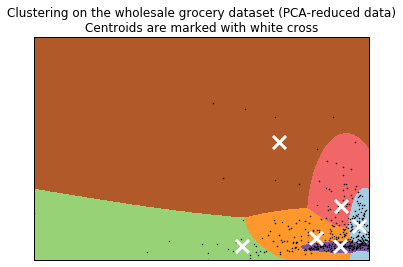

In [25]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

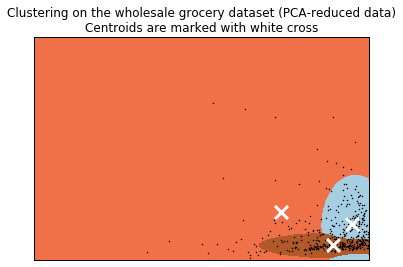

In [26]:
clusters = GMM(n_components=3)
clusters.fit(reduced_data)

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

centroids = clusters.means_

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

At the beginning I went with 3 clusters being the best in describing the dataset, but after looking at the 6 clusters I found it to have more detail and divided up the data much more into their own groups. However after appling inverse transformation to the centroids using PCA and plotting the result onto a bar graph I found that multiple groups have similar patterns, which means they should be in the same group. Because of this I've reduced the number of clusters back down to 3 so that each cluster has distinct buying patterns.

In [20]:
print pca_reduce.inverse_transform(centroids).round(4)

[[ 12457.3092   2407.3947   2959.5124   3152.769     506.0951   1135.1387]
 [  4706.2163   7141.5086  10770.6825   1927.6439   4483.4657   1291.535 ]
 [ 28340.2607  13184.2967  16791.5212   5606.5536   6453.7402   3320.3283]]


PCA's inverse transform function brings the 2 dimensional centroids into the 6 dimensional space of the original data set. After plotting these data on a bar graph, we can see these corresponds to the 3 centroids.

The first row is the long and flat cluster at the bottom right, representing customers who buys more fresh products than anything else, and not a lot of other products in comparison to fresh products. This is visualized by the shape of the cluster on the x-axis, in that most of the data within that cluster are not high up on the y-axis. This cluster represents fresh products oriented customers.

The second row represents the egg shaped cluster on the far right. Because the customers in this cluster are more generalized, their buying pattern as displayed on the bar chart shows that the amount spent in each catagory of products is similar to one another. We can also tell this by the rounder shape of the cluster, and some of the data points in the cluster have similar x and y coordinates. This cluster represents general goods customers.

The last row represents the cluster that's far out from the origin at the bottom right. These customers are different from either one of the other two customer groups because their buying pattern as shown in the bar chart is different. They are not just buying fresh products because they buy a significant amount of other products, and they're not generalized buyer either because the amount in the fresh, milk, and grocery catagory is much higher than the rest. This cluster represents a variety of customers, and they can include high volume buys, general grocery customers, bulk grocery customers, and other bulk item buying customers.

<img src="image1.png">

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster represent a typical customer in that segment of the market. For example in the dense cluster on the bottom right it would mean that there's many customers that are similar to one another and the central object would be the average, or the plain version of those customers

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I feel clustering gives me the most insight into the data because it visualizes the data into definitive groups. This is much faster for me to gain insight into as opposed to trying to extrapolate information from just numbers.

PCA creates composite features, and in this case tells you that the first two composite features accout for most of the variance in the data. This is helpful, especially before clustering we use PCA to reduce dimensionality from 6 to 2, and clustering builds on top of that to make the customer groups even easier to see.

ICA breaks down features and present the original sources, but in this case we don't know how much of the data set is really linearly separable and it doesn't tell us the size of each customer groups.

Clustering is best because it has the most amount of information on seperating the PCA reduced data. With the center of the cluster defined it shows the origin of the axes as between the two centers on the right, and it clearly defined the groups of customers.

**9)** How would you use that technique to help the company design new experiments?

Answer: I would use clustering to limit the impact of new experiments. For example if the company wants to change something it can apply the change to a certain cluster of customers, and see how the metrics change. This way if the experiments result in negative impact it won't affect the entire customer base.

If the company choose to implement the change, it can limit the implementation on the customer bases that have responded positively to that change, and do more testing on the next group of customers.

**10)** How would you use that data to help you predict future customer needs?

Answer: From the looks of the PCA reduced data it seems that most of the customer can be placed into somewhere along the x-axis or the y-axis with the origin at the bottom right. Once the company can clarify the traits or labels that apply to those customers then they can provide two different types of customer service that are tailored to those customers, and improve the customer satisfaction rate as a whole.

From the results of these unsupervised learning we can label the clusters, then we can feed these labeled customer data into supervised learning method, such as classify new customers into one of the groups, or estimate the potential demand for new customers.